# Utilizando openCV para comparar, detectar e manipular imagens e objetos 

A visão computacional representa um ramo da inteligencia artificial responsavel por lidar com a manipulações de imagens em um computador, utilizando métodos matematicos para tal. Neste notebook será utilizado a biblioteca openCV para explorar esta tecnologia.

### Fontes

* https://www.pyimagesearch.com/2015/01/26/multi-scale-template-matching-using-python-opencv/
* https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.htm
* https://docs.opencv.org/master/df/dfb/group__imgproc__object.html#gga3a7850640f1fe1f58fe91a2d7583695dac5babb7dfda59544e3e31ea928f8cb16

### Documentação do openCV

* https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html

### Authors

* Victor Bona - https://www.linkedin.com/in/victorbona/

In [0]:
# Execute this and reload runtime before run the cells
!pip install opencv-contrib-python-nonfree

     |████████████████████████████████| 34.9MB 117kB/s 


In [0]:
import cv2
import numpy as np
from skimage.measure import compare_ssim
from matplotlib import pyplot as plt
from collections import OrderedDict
from google.colab.patches import cv2_imshow

## Checando a similaridade entre imagens

### Teoria

Pontuação de similaridade oscila entre -1 e 1, onde 1 é a melhor taxa.



In [0]:
def image_compare(sample1, sample2):
  sample1 = cv.cvtColor(sample1, cv.COLOR_BGR2GRAY)
  sample2 = cv.cvtColor(sample2, cv.COLOR_BGR2GRAY)
  (score, diff) = compare_ssim(sample1, sample2, full=True)
  diff = (diff * 255).astype("uint8")
  return score, diff

print('Imagens bem diferentes')
print('-----------------------------------------------')
sample1 = cv.imread('sample1.jpg')  
sample2 = cv.imread('sample2.jpg')
score, diff = image_compare(sample1, sample2)
print(f'Similaridade: {score}')
print(f'Diferenças pontuais: {diff}')

print('-----------------------------------------------')

print('Imagens iguais')
print('-----------------------------------------------')
sample1 = cv.imread('sample1.jpg')  
sample2 = cv.imread('sample1.jpg')
score, diff = image_compare(sample1, sample2)
print(f'Similaridade: {score}')
print(f'Diferenças pontuais: {diff}')

Imagens bem diferentes
-----------------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  after removing the cwd from sys.path.


Similaridade: 0.17238181490080856
Diferenças pontuais: [[120 107  97 ... 193 193 193]
 [ 53  47  42 ... 193 193 193]
 [ 12  11  10 ... 193 193 193]
 ...
 [226 216 203 ...  36  34  34]
 [226 216 203 ...  49  47  49]
 [226 216 203 ...  58  59  63]]
Imagens iguais
-----------------------------------------------
Similaridade: 1.0
Diferenças pontuais: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


## Template matching

### Teoria

Este método tem por objetivo extrair objetos especificos de uma imagem utilizando inteligencia de maquina e visão computacional, facilitando assim a manipulação destes elementos de forma individual, evitando os demais ruidos e elementos que podem atrapalhar esta manipulação.

### Comparação dos métodos de detecção

...

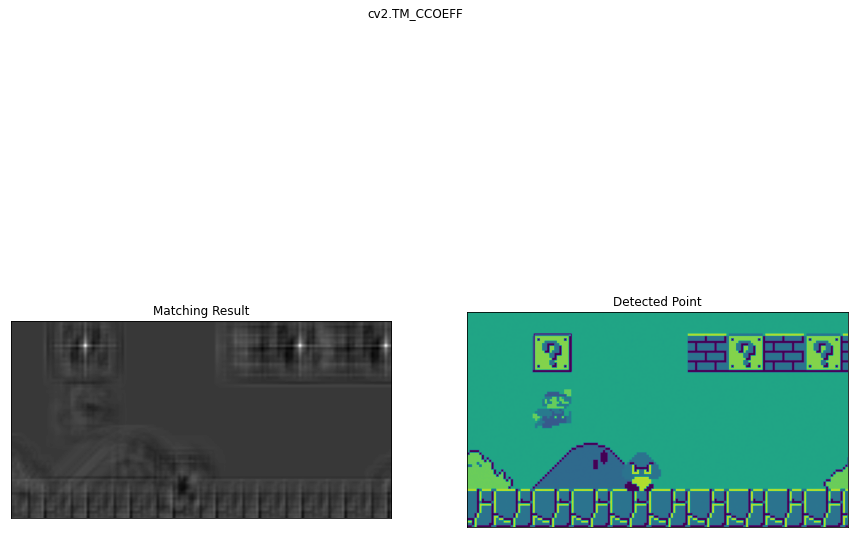

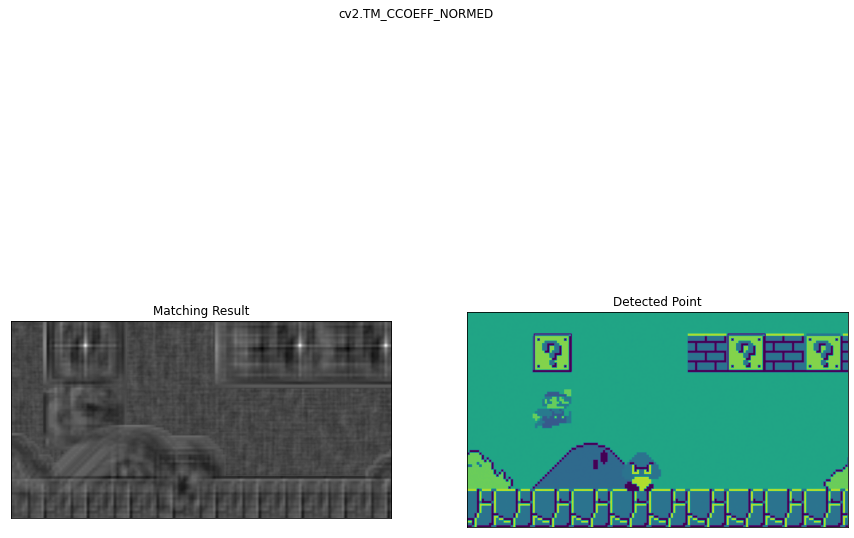

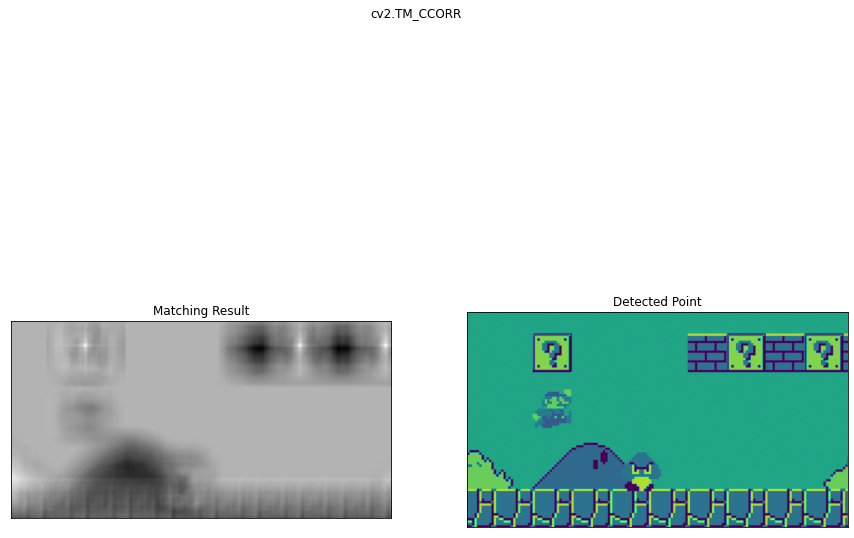

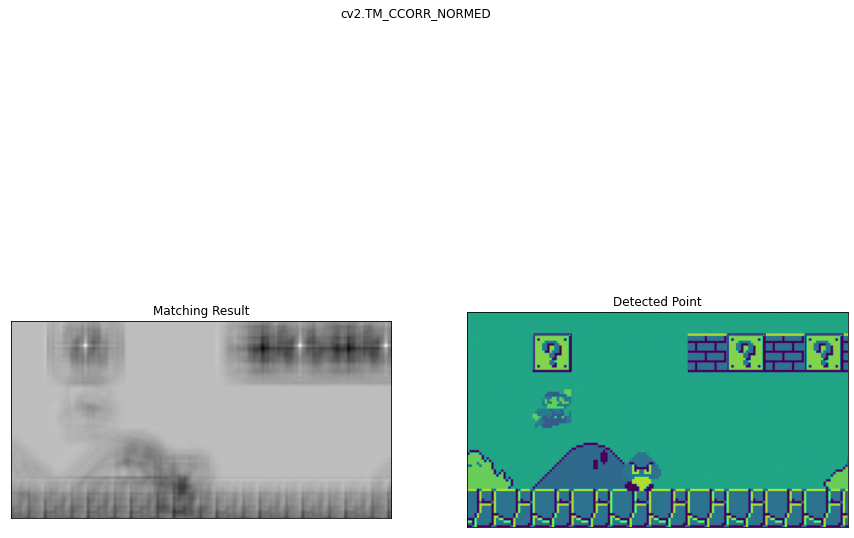

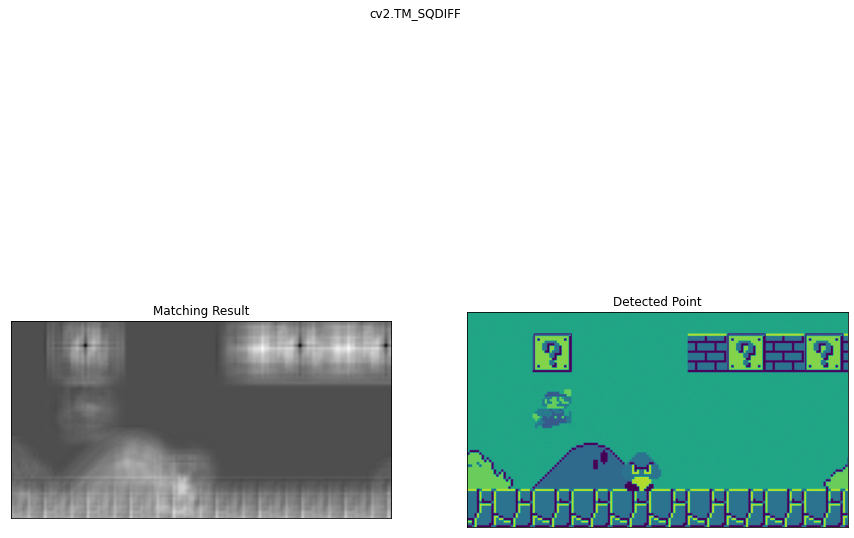

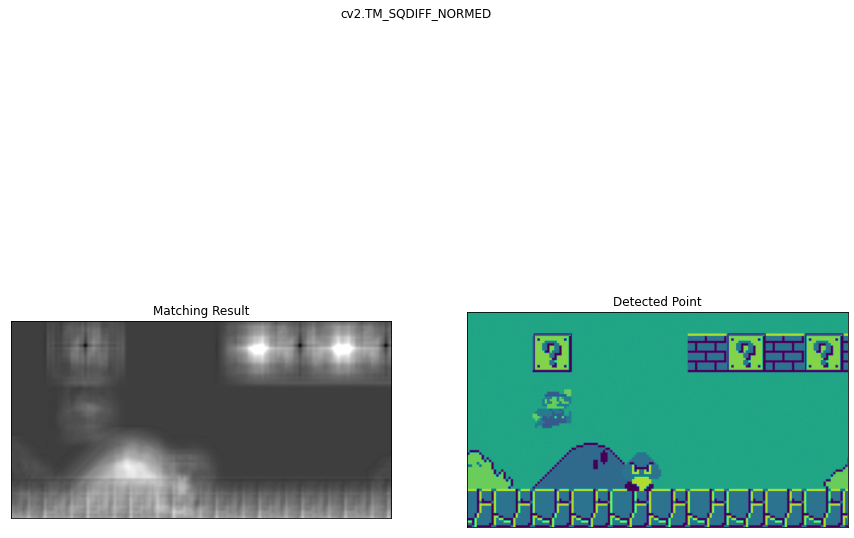

In [0]:
img = cv2.imread('mario_bros.png',0)
template = cv2.imread('brick_mario.png',0)
w, h = template.shape[::-1]
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img2 = img.copy()
    method = eval(meth)

    res = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    plt.figure(figsize=(15, 12))
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img ,top_left, bottom_right, (0, 255, 0), 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

### Detecção de multiplos elementos

O parametro principal utilizado para comparação dos objetos da imagem com o template é o "treshold", quanto mais baixo, mais facil o modelo encontrar todos os objetos similares ao template, contudo, maior o numero de possives ruidos.

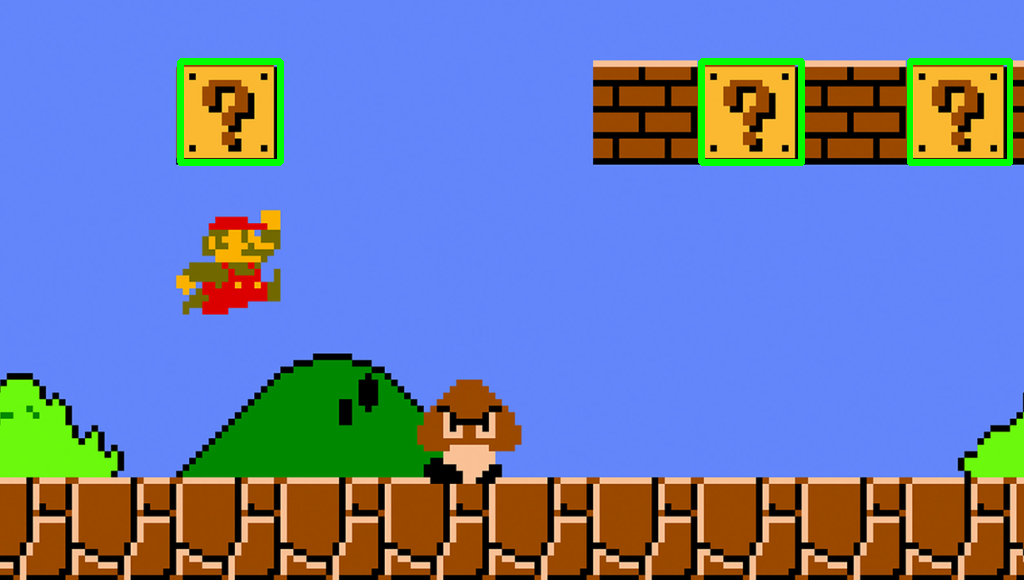

In [0]:
img = cv2.imread('mario_bros.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('brick_mario.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)

objects = []

for pt in zip(*loc[::-1]):
  item = img[pt[1]: pt[1]+h, pt[0]:pt[0]+w]
  cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,255,0), 2)

cv2_imshow(img)

# SIFT & Feature matching

### Teoria

...



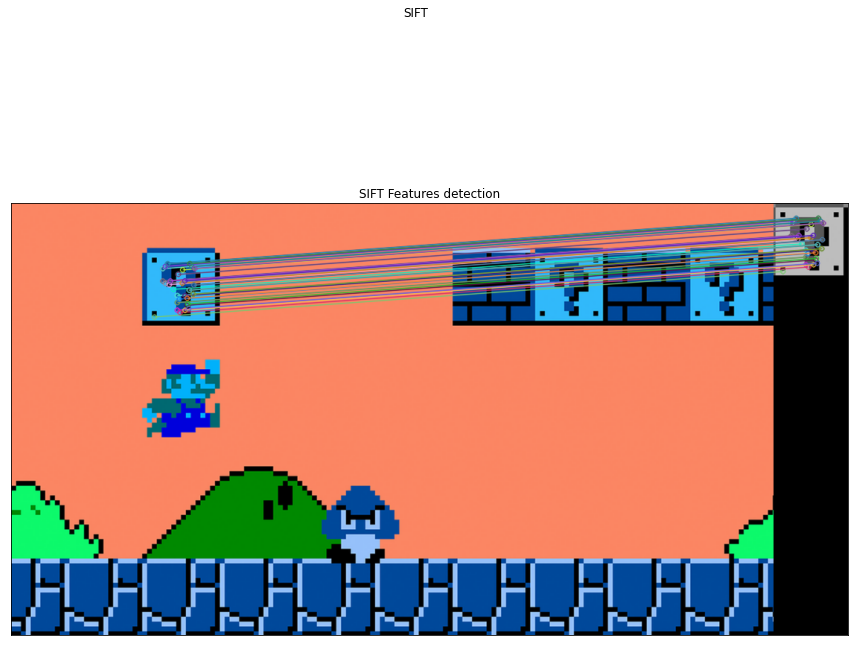

In [0]:
sample = cv2.imread('mario_bros.png')  
template = cv2.imread('brick_mario.png')

processed_sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
processed_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(processed_sample,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(processed_template,None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

result = cv2.drawMatches(sample, keypoints_1, processed_template, keypoints_2, matches[:50], processed_template, flags=2)
plt.figure(figsize=(15, 12))
plt.title('SIFT Features detection'), plt.xticks([]), plt.yticks([])
plt.suptitle('SIFT')
plt.imshow(result)
plt.show()